In [23]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

T1= 0.00012145479479806652 #s 
w=5.1575782375920979916 #GHZ
print(w)

E1=5.1575782375920979916  #GHZ
E2=5.1575782375920979916  #GHZ

5.157578237592098


In [37]:
g=1/T1
print(g*10**-3) #GHz

8.2335160309037


In [18]:
#IBMQubitProperties(t1=0.00012145479479806652, t2=7.761102386652387e-05, frequency=5157578237.592098, anharmonicity=-341524517.4784648)

In [48]:
t_i = 0 # intial time
t_f = 800#final time
nsteps = 10**4# number of steps between intial and final times
time = np.linspace(0,t_f, nsteps)
#xd = time/1e3

h = (t_f-t_i)/nsteps # increments
#intial_p=np.array([[1, 0],[0,0]])
V1=np.array([[1, 0],[0,0]], dtype=complex)
V2=np.array([[0, 0],[0,1]], dtype=complex)
    
#lamda1=(1.0/T1)*1e9 #ns
#lamda2=(1.0/T1)*1e9 #ns
H=np.array([[w/2, E1],[E2,-w/2]], dtype=complex)
gamma1=(1/T1)*10**(-3) #GHZ
gamma2=(1/T1)*10**(-3) #GHZ
kb= 1.380649*(10**(-23)) #J.K-1
temp= 1 #K
beta=1/(kb*temp) # J-1

#H=np.array([[w/2, E1],[E2,-w/2]], dtype=complex)
   
h_bar=1.054571817*(10**(-25)) #j.ns

C=2*(5*10**4)*(0.15) #GHZ
               
D=(5*10**4)*gamma1 #GHZ
E=2*(5*10**4)*(0.15)#GHZ
F=(5*10**4)*gamma2#GHZ

print("C : ",C)
print("D : ",D)
print("E : ",E)
print("F : ",F)
print("h_bar : ",h_bar)
#print("lamda 1 :",lamda1)
#print("lamda 2 : ",lamda2)
print("gamma1 : ",gamma1)
print("gamma2 : ",gamma2)
print("kb : ", kb)
print("temp : ",temp)
print("beta : ",beta)
print(len(time))


C :  15000.0
D :  411675.80154518504
E :  15000.0
F :  411675.80154518504
h_bar :  1.054571817e-25
gamma1 :  8.2335160309037
gamma2 :  8.2335160309037
kb :  1.380649e-23
temp :  1000000
beta :  7.24297051603992e+16
10000


In [49]:
def HEOM_eqn_solver(gamma1,gamma2,V1,V2,w,E1,E2,T1,beta,temp):
    #intial_val=np.array([[1, 0],[0,0]],dtype=complex)
    
    current_state = np.zeros((6,2,2),dtype=complex) # 6 2x2 matrices for p, \sigma_(0,1),\sigma_(1,0),\sigma_(1,1),\sigma_(2,0),\sigma_(0,2)
    prev_state = np.zeros((6,2,2),dtype=complex)

    current_state[0] = np.array([[1, 0],[0,0]], dtype=complex) # inital value for p
    prev_state[0]=current_state[0]

    p_matrix=np.zeros((nsteps,2,2),dtype=complex) # matrix that stores the matrices for d/dt(p)(results)
    p_matrix[0]=current_state[0]

    for index in range(1,len(time)):
        current_state[0] = prev_state[0] + h*( -1j*(np.dot(H,prev_state[0])-np.dot(prev_state[0],H)) + (np.dot(V1,prev_state[1])-np.dot(prev_state[1],V1)) + (np.dot(V2,prev_state[2])-np.dot(prev_state[2],V2)))
        p_matrix[index]=current_state[0] # stores result in p_matrix
        #0,1 # C and D are in units of us^-2
        current_state[1] = prev_state[1] + h*(-1j*(np.dot(H,prev_state[1])-np.dot(prev_state[1],H)) - gamma2*prev_state[1] + (np.dot(V1,prev_state[5])-np.dot(prev_state[5],V1)) + 1j*((C*(np.dot(V2,prev_state[0])-np.dot(prev_state[0],V2)) - 1j*D*gamma2*(np.dot(V2,prev_state[0])+np.dot(prev_state[0],V2)))) + (np.dot(V2,prev_state[4])-np.dot(prev_state[4],V2)))
        #1,0 E and F are in units of us^-2
        current_state[2] = prev_state[2] + h*(-1j*(np.dot(H,prev_state[2])-np.dot(prev_state[2],H)) - gamma1*prev_state[2] + (np.dot(V2,prev_state[5])-np.dot(prev_state[5],V2)) + 1j*((E*(np.dot(V1,prev_state[0])-np.dot(prev_state[0],V1)) - 1j*F*gamma1*(np.dot(V2,prev_state[0])+np.dot(prev_state[0],V2)))) + (np.dot(V1,prev_state[3])-np.dot(prev_state[3],V1)))

        current_state[3] = prev_state[3] + h*(-1j*(np.dot(H,prev_state[3])-np.dot(prev_state[3],H)))

        current_state[4] = prev_state[4] + h*(-1j*(np.dot(H,prev_state[4])-np.dot(prev_state[4],H)))

        current_state[5] = prev_state[5] + h*(-1j*(np.dot(H,prev_state[5])-np.dot(prev_state[5],H)))
        
        prev_state=current_state

    return p_matrix

sol=HEOM_eqn_solver(gamma1,gamma2,V1,V2,w,E1,E2,T1,beta,temp)
len(sol)
print(sol)

/var/folders/14/9y4tlbpx14zdmqbmh8__bwhm0000gn/T/ipykernel_7208/385403341.py:17: RuntimeWarning: overflow encountered in multiply
  current_state[1] = prev_state[1] + h*(-1j*(np.dot(H,prev_state[1])-np.dot(prev_state[1],H)) - gamma2*prev_state[1] + (np.dot(V1,prev_state[5])-np.dot(prev_state[5],V1)) + 1j*((C*(np.dot(V2,prev_state[0])-np.dot(prev_state[0],V2)) - 1j*D*gamma2*(np.dot(V2,prev_state[0])+np.dot(prev_state[0],V2)))) + (np.dot(V2,prev_state[4])-np.dot(prev_state[4],V2)))
/var/folders/14/9y4tlbpx14zdmqbmh8__bwhm0000gn/T/ipykernel_7208/385403341.py:17: RuntimeWarning: invalid value encountered in multiply
  current_state[1] = prev_state[1] + h*(-1j*(np.dot(H,prev_state[1])-np.dot(prev_state[1],H)) - gamma2*prev_state[1] + (np.dot(V1,prev_state[5])-np.dot(prev_state[5],V1)) + 1j*((C*(np.dot(V2,prev_state[0])-np.dot(prev_state[0],V2)) - 1j*D*gamma2*(np.dot(V2,prev_state[0])+np.dot(prev_state[0],V2)))) + (np.dot(V2,prev_state[4])-np.dot(prev_state[4],V2)))
/var/folders/14/9y4tlbpx1

[[[1.        +0.j         0.        +0.j        ]
  [0.        +0.j         0.        +0.j        ]]

 [[1.        +0.j         0.        +0.41260626j]
  [0.        -0.41260626j 0.        +0.j        ]]

 [[0.65951215+0.j         0.17024392+0.82521252j]
  [0.17024392-0.82521252j 0.34048785+0.j        ]]

 ...

 [[       nan       +nanj        nan       +nanj]
  [       nan       +nanj        nan       +nanj]]

 [[       nan       +nanj        nan       +nanj]
  [       nan       +nanj        nan       +nanj]]

 [[       nan       +nanj        nan       +nanj]
  [       nan       +nanj        nan       +nanj]]]


In [50]:

data1=sol[:,0,0]
dat_r=data1[::-1]  # data was reversed. This is probably not correct.


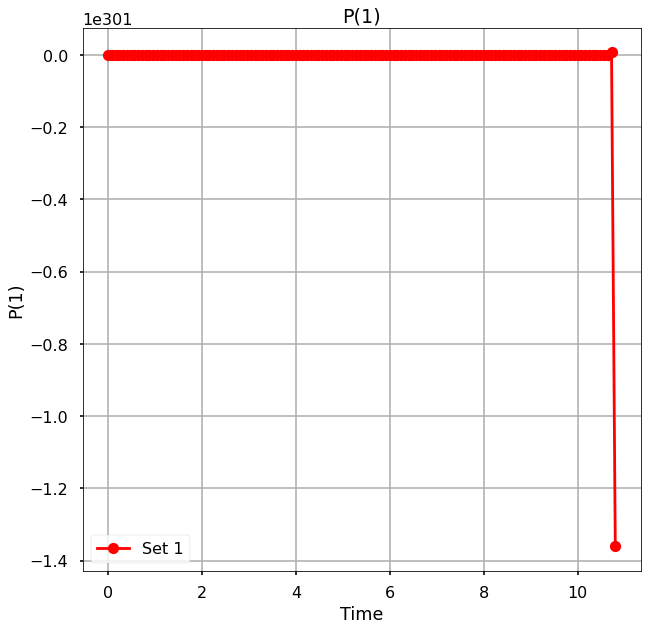

In [51]:

# Create a plot
plt.figure(figsize=(10, 10))
plt.plot(time, np.real(data1), label='Set 1', marker='o', linestyle='-', color='red') 

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('P(1)')
plt.title('P(1)')
plt.legend()

# Show the plot
plt.grid(True)  
plt.show()

In [8]:
#data from real device

import json

file_path = '/Users/Pashlene/Desktop/T1_data_proc.json'

try:
    with open(file_path, 'r') as file:
        data = json.load(file)
        
    # Iterate through the list of dictionaries
    for dictionary in data:
        print(dictionary)
except FileNotFoundError:
    print(f"The file '{file_path}' does not exist.")
except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")


time
counts_1
prob_1
tot_counts


In [9]:
# Create an empty list to store the lists of data
data_lists = []

# Iterate through the dictionary keys and values
for key, value in data.items():
    data_lists.append(value)

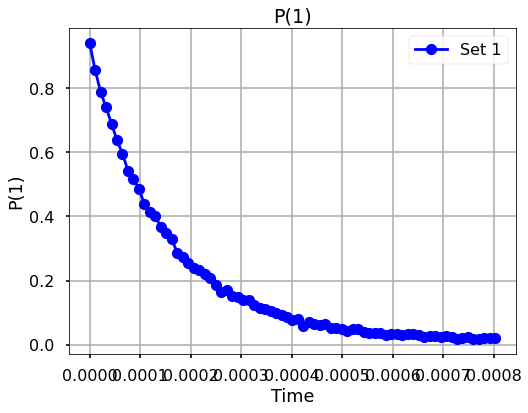

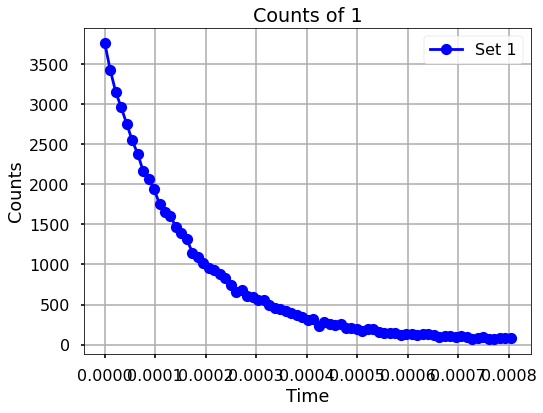

In [10]:
time1=data_lists[0]
datas=data_lists[2]

import matplotlib.pyplot as plt


# Create a plot
plt.figure(figsize=(8, 6)) 
plt.plot(time1, datas, label='Set 1', marker='o', linestyle='-', color='blue')

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('P(1)')
plt.title('P(1)')
plt.legend()

# Show the plot
plt.grid(True) 
plt.show()


# Create a plot
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.plot(time1, data_lists[1], label='Set 1', marker='o', linestyle='-', color='blue')

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Counts')
plt.title('Counts of 1')
plt.legend()

# Show the plot
plt.grid(True) 
plt.show()


In [11]:
# the theoretical data was larger by 1e11 , so i divided it by 1e11
#dat_r means the data from HEOM was reversed. This is probably not correct.
p=[]
for i in dat_r:
    p.append(i/1e11)
    

r=[]
for j in data1:
    r.append(j/1e11)

ValueError: x and y must have same first dimension, but have shapes (75,) and (10000,)

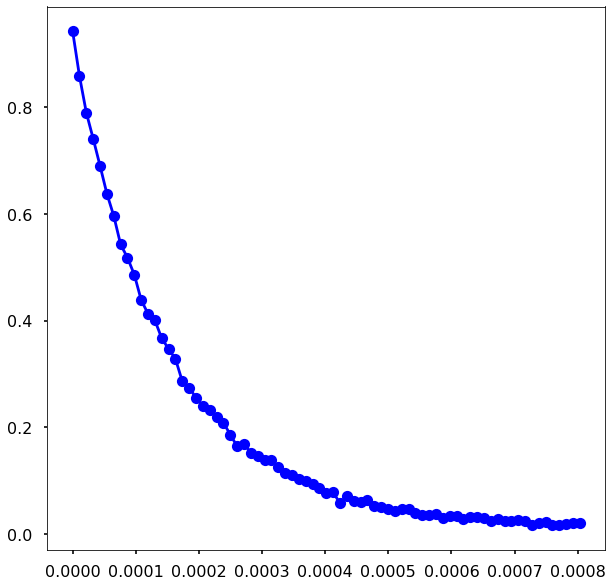

In [12]:
# Create a plot
plt.figure(figsize=(10, 10))  
plt.plot(time1, datas, label='device', marker='o', linestyle='-', color='blue')
plt.plot(time1, np.real(p), label='reversed data from eqn', marker='o', linestyle='-', color='red')
plt.plot(time1, np.real(r), label=' not reveresed data from eqn', marker='o', linestyle='-', color='green')


# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Counts')
plt.title('Counts of 1')
plt.legend()

# Show the plot
plt.grid(True) 
plt.show()
